In [131]:

import RELUNTK
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import pandas as pd 
import torch.optim
import torch
import torch.nn.functional as F

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0, 0.5, 'Y')

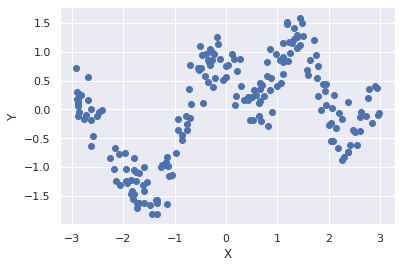

In [128]:
train_data = pd.read_csv("Simple_train.csv" )
#centring = train_data.mean(axis = 0)
train_data = train_data - centring


Xtrain = torch.tensor(train_data["X"].values.reshape(-1,1)   ,dtype = torch.float)
Ytrain = torch.tensor(train_data["Y"].values.reshape(-1,1) , dtype = torch.float)


plt.scatter(Xtrain, Ytrain )
plt.xlabel("X")
plt.ylabel("Y")
#plt.savefig("toydatauncentred")

In [ ]:
plt.scatter(Xtrain, Ytrain )

In [118]:
#Ytrain = 5*Xtrain * (Xtrain>0) + 0.2 * torch.randn(Ytrain.shape) - 2 * 5*Xtrain * (Xtrain < 0)

Xtrainwithbias = torch.zeros(( len(Xtrain) , 2))
Xtrainwithbias[:,0] = Xtrain.flatten()
Xtrainwithbias[:,1] = 1

In [211]:
def train_model(nhidden , seed = 1 , show = False):
    seed = seed
    model = RELUNTK.NTKtest(1,nhidden,1)
    lr = 0.1
    optimizer = torch.optim.SGD(model.parameters(), lr = lr )
    epochs = 20000
    torch.manual_seed(seed)
    #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50 , gamma=0.05 , last_epoch=-1)
    for i in range(epochs):
        loss = RELUNTK.train(model , Xtrain , optimizer , Ytrain , nhidden)
        #scheduler.step()
        if (i % 50==0 or i == epochs-1)  and show:

            print("Epoch %5d/%5d , loss = %5.4f " % (i+1 , epochs , loss.item() , ))
        
    return model
        




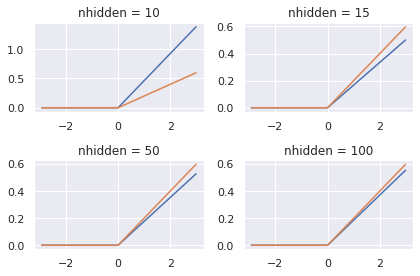

In [270]:
p = [[10,15],[50,100]]
fig ,axs = plt.subplots(2 , 2)

for i in range(len(p)):
    for j in  range(2):
        x = np.linspace(min(Xtrain)[0],max(Xtrain)[0] , 100)
        empdynamik = []
        theoricdynamik = []
        model =  train_model(p[i][j] )
        for a in x:
            empdynamik.append(model.Empiricaldynamique(torch.tensor([0.1  ] , requires_grad = True ) , torch.tensor([a ] , requires_grad = True ) , p[i][j]))
            theoricdynamik.append(RELUNTK.kernel_test(np.array([0.1]) , np.array([a])))
        axs[i][j].plot(x, np.array(empdynamik) , label = "practical dynamics")
        axs[i][j].plot(x , theoricdynamik , label = "theorical dynamics")
        axs[i][j].set_title("nhidden = %d" %(p[i][j]))
        fig.tight_layout()

fig.savefig("differentpvalues")

        
        
    
    

In [254]:
model = train_model(5000 , seed = 1 , show = True)

Epoch     1/20000 , loss = 3.9878 
Epoch    51/20000 , loss = 0.5802 
Epoch   101/20000 , loss = 0.5802 
Epoch   151/20000 , loss = 0.5802 
Epoch   201/20000 , loss = 0.5802 
Epoch   251/20000 , loss = 0.5802 
Epoch   301/20000 , loss = 0.5802 
Epoch   351/20000 , loss = 0.5802 
Epoch   401/20000 , loss = 0.5802 
Epoch   451/20000 , loss = 0.5802 
Epoch   501/20000 , loss = 0.5802 
Epoch   551/20000 , loss = 0.5802 
Epoch   601/20000 , loss = 0.5802 
Epoch   651/20000 , loss = 0.5802 
Epoch   701/20000 , loss = 0.5802 
Epoch   751/20000 , loss = 0.5802 
Epoch   801/20000 , loss = 0.5802 
Epoch   851/20000 , loss = 0.5802 
Epoch   901/20000 , loss = 0.5802 
Epoch   951/20000 , loss = 0.5802 
Epoch  1001/20000 , loss = 0.5802 
Epoch  1051/20000 , loss = 0.5802 
Epoch  1101/20000 , loss = 0.5802 
Epoch  1151/20000 , loss = 0.5802 
Epoch  1201/20000 , loss = 0.5802 
Epoch  1251/20000 , loss = 0.5802 
Epoch  1301/20000 , loss = 0.5802 
Epoch  1351/20000 , loss = 0.5802 
Epoch  1401/20000 , 

KeyboardInterrupt: 

In [256]:
model.Empiricaldynamique(torch.tensor([1.] , requires_grad = True ) , torch.tensor([0.1 ] , requires_grad = True ) , 5000)

tensor([0.2014])

In [261]:
RELUNTK.kernel_test(np.array([0.1 ]),np.array([1]))

0.2

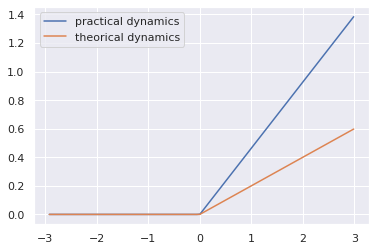

In [159]:
x = np.linspace(min(Xtrain)[0],max(Xtrain)[0] , 100)
empdynamik = []
theoricdynamik = []
for a in x:
    empdynamik.append(model.Empiricaldynamique(torch.tensor([0.1  ] , requires_grad = True ) , torch.tensor([a ] , requires_grad = True ) , nhidden))
    theoricdynamik.append(RELUNTK.kernel_test(np.array([0.1]) , np.array([a])))

plt.plot( x, np.array(empdynamik) , label = "practical dynamics")
plt.plot(x , theoricdynamik , label = "theorical dynamics")
plt.legend()


In [33]:
x.

array([[0.0592    ],
       [0.11890505],
       [0.1786101 ],
       [0.23831515],
       [0.29802018],
       [0.35772523],
       [0.41743028],
       [0.47713533],
       [0.5368404 ],
       [0.5965454 ],
       [0.6562505 ],
       [0.71595556],
       [0.7756606 ],
       [0.8353656 ],
       [0.8950707 ],
       [0.95477575],
       [1.0144808 ],
       [1.0741858 ],
       [1.1338909 ],
       [1.193596  ],
       [1.253301  ],
       [1.313006  ],
       [1.3727112 ],
       [1.4324162 ],
       [1.4921212 ],
       [1.5518262 ],
       [1.6115313 ],
       [1.6712364 ],
       [1.7309414 ],
       [1.7906464 ],
       [1.8503516 ],
       [1.9100566 ],
       [1.9697616 ],
       [2.0294666 ],
       [2.0891716 ],
       [2.1488767 ],
       [2.2085817 ],
       [2.268287  ],
       [2.327992  ],
       [2.387697  ],
       [2.447402  ],
       [2.507107  ],
       [2.566812  ],
       [2.626517  ],
       [2.6862223 ],
       [2.7459273 ],
       [2.8056324 ],
       [2.865

In [60]:
Xfitted = model.forward(Xtrain, nhidden)

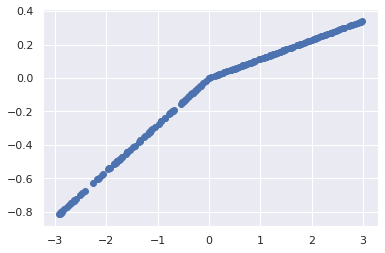

In [61]:
plt.scatter(Xtrain , Xfitted.detach().numpy())